### **Electroencephalography is a method to record an electrogram of the spontaneous electrical activity of the brain.**

This is a dataset of EEG brainwave data that has been processed with our original strategy of statistical extraction (paper below)
The data was collected from two people (1 male, 1 female) for 3 minutes per state - positive, neutral, negative. We used a Muse EEG headband which recorded the TP9, AF7, AF8 and TP10 EEG placements via dry electrodes. Six minutes of resting neutral data is also recorded, the stimuli used to evoke the emotions are below

In [16]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.impute import SimpleImputer

In [2]:
data = pd.read_csv('emotions.csv')

In [3]:
data.head()

,# mean_0_a,mean_1_a,mean_2_a,mean_3_a,mean_4_a,mean_d_0_a,mean_d_1_a,mean_d_2_a,mean_d_3_a,mean_d_4_a,...,fft_741_b,fft_742_b,fft_743_b,fft_744_b,fft_745_b,fft_746_b,fft_747_b,fft_748_b,fft_749_b,label
0,4.62,30.3,-356.0,15.6,26.3,1.070,0.411,-15.70,2.06,3.15,...,23.5,20.3,20.3,23.5,-215.0,280.00,-162.00,-162.00,280.00,NEGATIVE
1,28.80,33.1,32.0,25.8,22.8,6.550,1.680,2.88,3.83,-4.82,...,-23.3,-21.8,-21.8,-23.3,182.0,2.57,-31.60,-31.60,2.57,NEUTRAL
2,8.90,29.4,-416.0,16.7,23.7,79.900,3.360,90.20,89.90,2.03,...,462.0,-233.0,-233.0,462.0,-267.0,281.00,-148.00,-148.00,281.00,POSITIVE
3,14.90,31.6,-143.0,19.8,24.3,-0.584,-0.284,8.82,2.30,-1.97,...,299.0,-243.0,-243.0,299.0,132.0,-12.40,9.53,9.53,-12.40,POSITIVE
4,28.30,31.3,45.2,27.3,24.5,34.800,-5.790,3.06,41.40,5.52,...,12.0,38.1,38.1,12.0,119.0,-17.60,23.90,23.90,-17.60,NEUTRAL


In [4]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

### Preprocess the data

In [5]:
# Handle missing values
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)


In [6]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Train the Model

In [9]:

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [10]:
# Evaluate the model
y_pred = model.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Classification Report:\n{classification_report(y_test, y_pred)}')

Accuracy: 0.9882903981264637
Classification Report:
              precision    recall  f1-score   support

    NEGATIVE       0.97      0.99      0.98       143
     NEUTRAL       1.00      1.00      1.00       148
    POSITIVE       0.99      0.97      0.98       136

    accuracy                           0.99       427
   macro avg       0.99      0.99      0.99       427
weighted avg       0.99      0.99      0.99       427



### Separate the data based on labels

In [11]:
negative_data = data[data.iloc[:, -1] == 'NEGATIVE']
neutral_data = data[data.iloc[:, -1] == 'NEUTRAL']
positive_data = data[data.iloc[:, -1] == 'POSITIVE']


In [12]:
negative_data.to_csv('negative.csv', index=False)
neutral_data.to_csv('neutral.csv', index=False)
positive_data.to_csv('positive.csv', index=False)

### Load the negative.csv file into a DataFrame

In [5]:
negative_data = pd.read_csv('negative.csv')


In [6]:
negative_data.head()

,# mean_0_a,mean_1_a,mean_2_a,mean_3_a,mean_4_a,mean_d_0_a,mean_d_1_a,mean_d_2_a,mean_d_3_a,mean_d_4_a,...,fft_741_b,fft_742_b,fft_743_b,fft_744_b,fft_745_b,fft_746_b,fft_747_b,fft_748_b,fft_749_b,label
0,4.62,30.3,-356.00,15.60,26.3,1.07,0.411,-15.70,2.06,3.150,...,23.50,20.3,20.3,23.50,-215.00,280.0,-162.0,-162.0,280.0,NEGATIVE
1,17.80,27.8,-102.00,16.90,26.9,-3.21,-1.950,9.80,-3.24,-0.955,...,-177.00,32.8,32.8,-177.00,-417.00,384.0,-186.0,-186.0,384.0,NEGATIVE
2,8.91,29.2,-314.00,6.51,30.9,-1.88,1.900,11.90,-3.60,5.700,...,226.00,-81.8,-81.8,226.00,1.84,99.4,-40.3,-40.3,99.4,NEGATIVE
3,13.30,30.4,-149.00,11.80,28.3,3.03,0.895,-4.52,1.72,-0.633,...,6.11,20.0,20.0,6.11,-53.00,176.0,-167.0,-167.0,176.0,NEGATIVE
4,19.30,31.7,-4.56,23.80,32.9,-3.41,0.677,46.60,6.80,3.890,...,244.00,-144.0,-144.0,244.00,18.50,-14.8,10.3,10.3,-14.8,NEGATIVE


In [7]:
negative_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 708 entries, 0 to 707
Columns: 2549 entries, # mean_0_a to label
dtypes: float64(2548), object(1)
memory usage: 13.8+ MB


### Importing libraries needed for Unsupervised Learning

In [8]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

In [10]:
negative = negative_data.drop(columns=['label'])

In [13]:
negative.head()

,# mean_0_a,mean_1_a,mean_2_a,mean_3_a,mean_4_a,mean_d_0_a,mean_d_1_a,mean_d_2_a,mean_d_3_a,mean_d_4_a,...,fft_740_b,fft_741_b,fft_742_b,fft_743_b,fft_744_b,fft_745_b,fft_746_b,fft_747_b,fft_748_b,fft_749_b
0,4.62,30.3,-356.00,15.60,26.3,1.07,0.411,-15.70,2.06,3.150,...,74.3,23.50,20.3,20.3,23.50,-215.00,280.0,-162.0,-162.0,280.0
1,17.80,27.8,-102.00,16.90,26.9,-3.21,-1.950,9.80,-3.24,-0.955,...,430.0,-177.00,32.8,32.8,-177.00,-417.00,384.0,-186.0,-186.0,384.0
2,8.91,29.2,-314.00,6.51,30.9,-1.88,1.900,11.90,-3.60,5.700,...,-98.1,226.00,-81.8,-81.8,226.00,1.84,99.4,-40.3,-40.3,99.4
3,13.30,30.4,-149.00,11.80,28.3,3.03,0.895,-4.52,1.72,-0.633,...,151.0,6.11,20.0,20.0,6.11,-53.00,176.0,-167.0,-167.0,176.0
4,19.30,31.7,-4.56,23.80,32.9,-3.41,0.677,46.60,6.80,3.890,...,-421.0,244.00,-144.0,-144.0,244.00,18.50,-14.8,10.3,10.3,-14.8


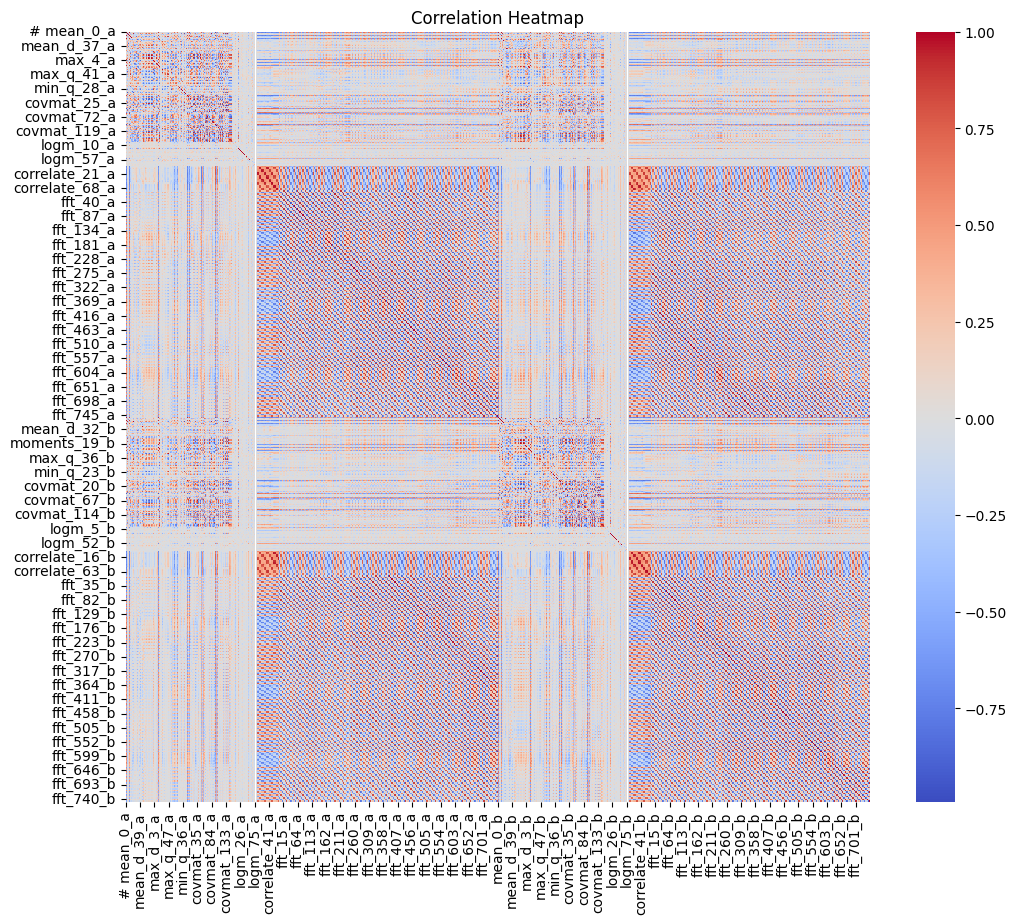

In [17]:
# Calculate correlation matrix
corr_matrix = negative.corr()

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False)
plt.title('Correlation Heatmap')
plt.show()


### Data Normalization

In [11]:
scaler = StandardScaler()
normalized_data = scaler.fit_transform(negative)

### Dimensionality Reduction 

In [31]:
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(normalized_data)


### K-Means Clustering

In [32]:
kmeans = KMeans(n_clusters=4, random_state=42)  # Choose k based on your problem
labels = kmeans.fit_predict(reduced_data)


In [33]:
score = silhouette_score(reduced_data, labels)
print("Silhouette Score:", score)

Silhouette Score: 0.507084494730477


**Silhouette Score ranges from -1 to +1, with higher values indicating better-defined clusters and lower values indicating poorer clustering.**

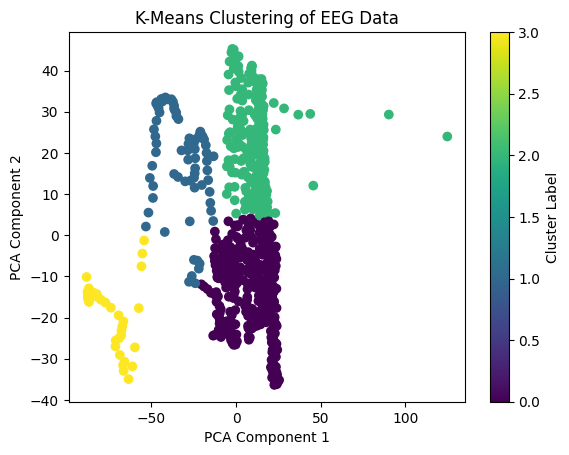

In [34]:
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=labels, cmap='viridis')
plt.title("K-Means Clustering of EEG Data")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label='Cluster Label')
plt.show()